In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
print(df['Class'].value_counts())  # 0 = non-fraud, 1 = fraud

Class
0.0    13897
1.0       56
Name: count, dtype: int64


In [ ]:
print(df.tail())

        Time        V1        V2        V3        V4        V5        V6  \
13949  24754  1.252924 -0.182189 -0.802716 -0.210981  1.916713  3.643624   
13950  24756 -0.346979 -2.103284 -0.685061  1.961605 -0.401125  0.473632   
13951  24759 -6.053652 -5.988723  0.810413 -0.011811  1.308135 -0.590803   
13952  24759  1.169121 -1.284945  0.032717 -0.681670  0.660598  4.412578   
13953  24759 -6.917152  5.854171 -1.652458 -1.488884 -0.833891 -0.344418   

             V7        V8        V9  ...       V21       V22       V23  \
13949 -0.778711  0.818295  1.706962  ... -0.497088 -1.211285  0.043809   
13950  1.133816 -0.256528  0.893409  ...  0.359662 -0.316275 -0.864259   
13951 -0.725838 -0.234840  1.624646  ... -0.771970  1.474668  3.176363   
13952 -1.913115  1.076592  1.501230  ... -0.557596 -0.882435 -0.041523   
13953  0.393789  0.379968  6.133597  ... -1.404681 -1.124694  0.174333   

            V24       V25       V26       V27       V28  Amount  Class  
13949  0.964159  0.442030

##handling duplicates and missing values

In [ ]:
df.duplicated().sum()

np.int64(53)

In [ ]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
221,145,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0.0
223,145,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,...,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0.0
1178,919,0.904289,-0.538055,0.396058,0.500680,-0.864473,-0.657199,0.027231,-0.029473,0.265447,...,-0.099460,-0.597579,-0.048666,0.551824,0.182934,0.402176,-0.081357,0.027252,158.00,0.0
1180,919,1.207596,-0.036860,0.572104,0.373148,-0.709633,-0.713698,-0.181105,0.011277,0.283940,...,-0.194591,-0.514717,0.089714,0.543768,0.240581,0.418921,-0.051693,-0.000085,1.00,0.0
1382,1074,-2.248488,-0.195670,0.026949,-0.525780,-0.238759,-0.033359,0.162196,0.928520,-0.424215,...,-0.032208,-0.745757,-0.243193,-0.821633,-0.030402,0.335838,-0.286998,-0.243768,158.00,0.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,...,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13900.000000,13900.000000
mean,10132.095245,-0.232840,0.281483,0.846450,0.300122,-0.118347,0.125497,-0.156140,-0.014682,0.989314,...,-0.070498,-0.156265,-0.035962,0.012080,0.116952,0.036461,0.014107,0.002193,64.030378,0.004029
std,7734.602422,1.718300,1.393691,1.563379,1.501822,1.290997,1.320997,1.239432,1.255446,1.214144,...,0.864928,0.620866,0.500231,0.586796,0.427916,0.558649,0.392189,0.255756,178.189809,0.063347
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2998.000000,-0.967606,-0.283766,0.407857,-0.625913,-0.716347,-0.625692,-0.613949,-0.181932,0.288704,...,-0.271435,-0.547934,-0.173916,-0.338865,-0.136385,-0.374495,-0.076831,-0.014884,5.490000,0.000000
50%,9140.000000,-0.319024,0.252569,0.961790,0.218372,-0.190172,-0.147628,-0.111763,0.016665,0.971970,...,-0.132273,-0.121844,-0.045092,0.060931,0.154804,-0.034399,-0.000983,0.016193,15.820000,0.000000
75%,17110.000000,1.162962,0.882742,1.608281,1.193083,0.351077,0.505630,0.422208,0.264876,1.653402,...,0.018418,0.229071,0.069469,0.392837,0.393032,0.375760,0.098500,0.072272,52.392500,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


##EXPLORATORY DATA ANALYSIS

In [ ]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

Time
3767     0.151068
3770     0.143875
19912    0.136681
3750     0.136681
3749     0.122293
           ...   
24720    0.007194
24721    0.007194
24723    0.007194
24695    0.007194
24697    0.007194
Name: count, Length: 9480, dtype: float64
V1
-0.302521    0.258974
 0.898614    0.201424
 1.012595    0.172649
 1.284475    0.165456
 1.109985    0.136681
               ...   
 0.745180    0.007194
 1.125216    0.007194
 0.234575    0.007194
 0.396462    0.007194
-0.612943    0.007194
Name: count, Length: 13495, dtype: float64
V2
 0.447474    0.258974
 0.033896    0.201424
 0.185411    0.172649
-0.528597    0.165456
 0.368032    0.136681
               ...   
-1.973016    0.007194
 0.163179    0.007194
-1.314502    0.007194
-1.061374    0.007194
 0.646731    0.007194
Name: count, Length: 13495, dtype: float64
V3
-0.495757    0.258974
-0.083297    0.201424
 1.857002    0.172649
-0.551952    0.165456
-0.061407    0.136681
               ...   
 0.420769    0.007194
 0.498409    0.007194


In [ ]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.995971
1.0,0.004029


<ipython-input-18-fd6683df195b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


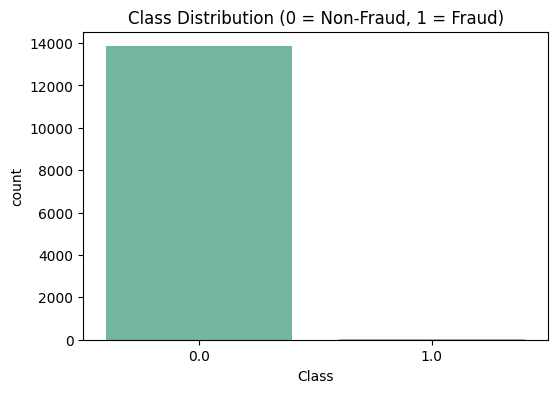

In [ ]:
# Countplot of fraud vs non-fraud
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

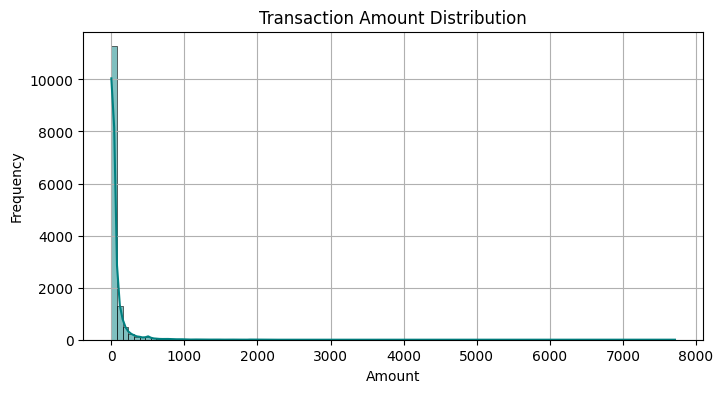

In [ ]:
# Transaction Amount Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=100, kde=True, color='teal')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

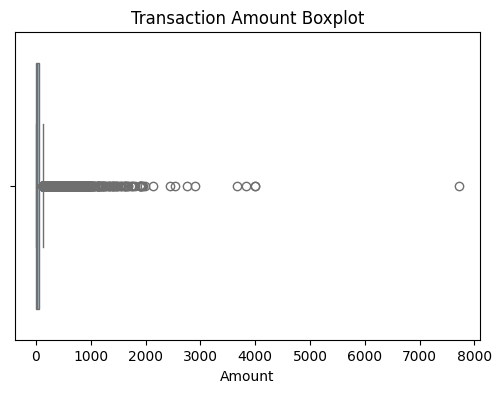

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Amount'], color='skyblue')
plt.title("Transaction Amount Boxplot")
plt.show()

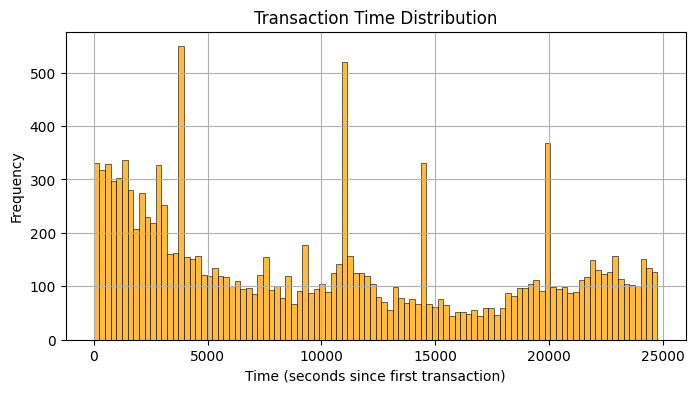

In [ ]:
# Transaction Time Distribution
# -------------------------------
plt.figure(figsize=(8, 4))
sns.histplot(df['Time'], bins=100, kde=False, color='orange')
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Feature Engineering: Convert Time to Hour of Day
df['Hour'] = (df['Time'] // 3600) % 24

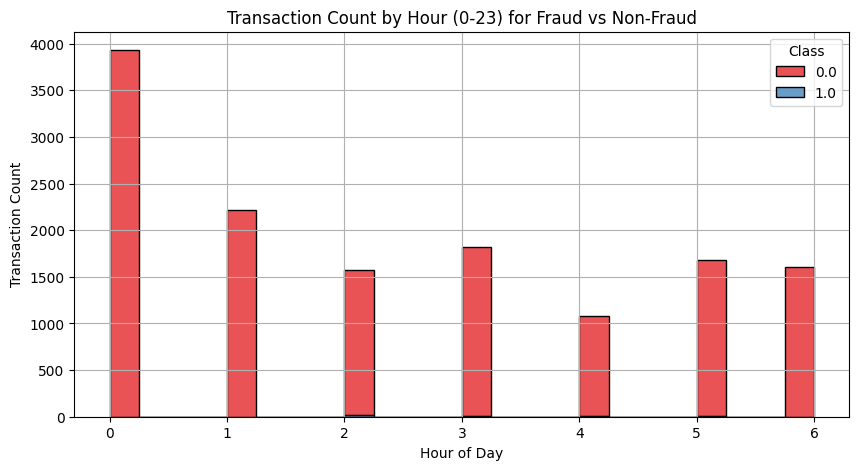

In [ ]:
# Plot fraud vs non-fraud by hour
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Hour', hue='Class', multiple='stack', palette='Set1', bins=24)
plt.title("Transaction Count by Hour (0-23) for Fraud vs Non-Fraud")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.grid(True)
plt.show()

##FEATURE ENGINERING

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale 'Amount' column

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Extract Hour from 'Time' column
df['Hour'] = (df['Time'] // 3600) % 24

# Drop unused/raw columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Outlier Capping (Winsorization) on scaled_amount
Q1 = df['scaled_amount'].quantile(0.25)
Q3 = df['scaled_amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Apply capping
df['scaled_amount'] = np.where(df['scaled_amount'] > upper, upper,
                        np.where(df['scaled_amount'] < lower, lower, df['scaled_amount']))

# Final Check
print("Final DataFrame Shape:", df.shape)
print(df[['scaled_amount', 'Hour', 'Class']].head())


Final DataFrame Shape: (13901, 31)
   scaled_amount  Hour  Class
0       0.329525     0    0.0
1      -0.344254     0    0.0
2       0.329525     0    0.0
3       0.329525     0    0.0
4       0.033447     0    0.0


In [30]:
df['Class'] = df['Class'].fillna(df['Class'].median())

In [32]:
df['Class'].isnull().sum()

np.int64(0)

In [37]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [38]:
df['scaled_amount'] = df['scaled_amount'].fillna(df['scaled_amount'].median())

#MODEL TRAINING AND EVALUATION

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [40]:
X = df.drop('Class', axis=1)
y = df['Class']

In [41]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [42]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

 Random Forest Evaluation
Accuracy: 0.9992808342322905
Precision: 1.0
Recall: 0.8181818181818182
F1 Score: 0.9
Confusion Matrix:
 [[2770    0]
 [   2    9]]


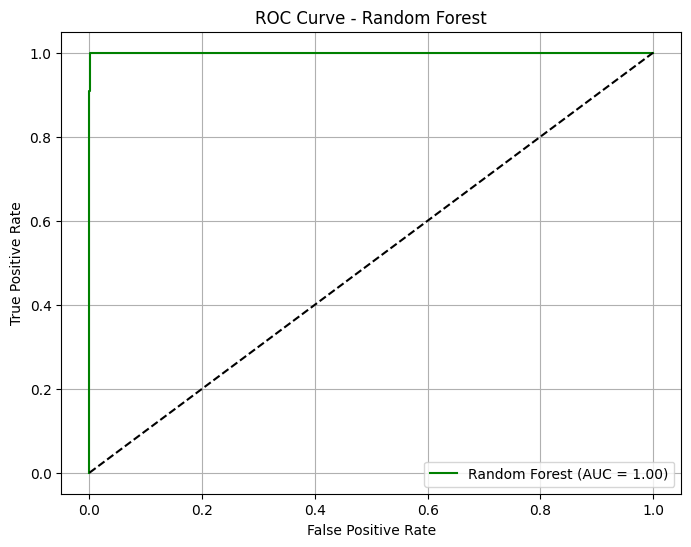

In [43]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predict on validation set
y_pred = rf_model.predict(X_val)
y_prob = rf_model.predict_proba(X_val)[:, 1]

# Evaluation Metrics
print(" Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


#MODEL TUNNING

Manually Tuned Random Forest Evaluation
Accuracy: 0.9992808342322905
Precision: 1.0
Recall: 0.8181818181818182
F1 Score: 0.9
Confusion Matrix:
 [[2770    0]
 [   2    9]]


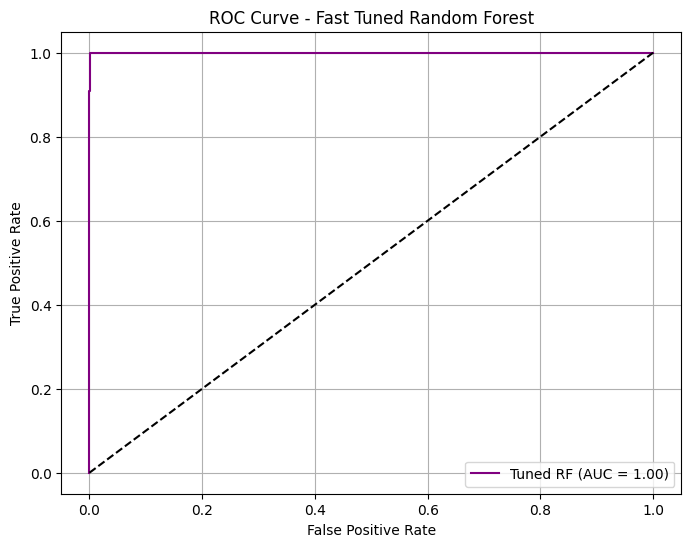

In [50]:

rf_model = RandomForestClassifier(
    n_estimators=150,       # Try 100, 150, 200
    max_depth=10,           # Try 10, 15, None
    min_samples_split=5,    # Try 2, 5
    min_samples_leaf=2,     # Try 1, 2
    max_features='sqrt',    # Try 'sqrt', 'log2'
    random_state=42
)

rf_model.fit(X_resampled, y_resampled)

# Predict on validation set
y_pred = rf_model.predict(X_val)
y_prob = rf_model.predict_proba(X_val)[:, 1]

# Evaluation
print("Manually Tuned Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Tuned RF (AUC = {auc:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Fast Tuned Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


#MODEL SAVING

In [51]:
import joblib

# Save the model
joblib.dump(rf_model, 'tuned_rf_model.pkl')

print("Model saved as tuned_rf_model.pkl")


Model saved as tuned_rf_model.pkl
